# Spotify Data Visualization

**Importing Libraries**

In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt

캐글의 디렉토리 구조는 `kaggle`이라는 디렉토리 안에 다음과 같이 만들어진다.
* `lib`: 필요한 파이썬 라이브러리 저장
* `input`: 데이터셋 저장
* `working` : 실행 중인 캐글 노트북 디렉토리


In [3]:
print(os.getcwd())
os.chdir('/kaggle/')
print(os.listdir(os.getcwd()))

/kaggle/working
['lib', 'input', 'working']


### 스포티파이 데이터셋
스포티파이 데이터셋은 다음과 같이 이루어져있다.
* 'spotify-dataset-19212020-160k-tracks/data.csv'
* 'spotify-dataset-19212020-160k-tracks/data_by_artist.csv'
* 'spotify-dataset-19212020-160k-tracks/data_by_genres.csv'
* 'spotify-dataset-19212020-160k-tracks/data_by_year.csv'
* 'spotify-dataset-19212020-160k-tracks/data_w_genres.csv'

In [4]:
# 스포티파이 데이터셋 가져오기
data = pd.read_csv('../input/spotify-dataset-19212020-160k-tracks/data.csv')
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [51]:
# 각 아티스트들이 부른 노래의 오디오 피쳐를 담은 데이터셋
data_artist = pd.read_csv('../input/spotify-dataset-19212020-160k-tracks/data_by_artist.csv')
data_artist.head()
print(data_artist.shape)

(32539, 15)


In [6]:
# 각 장르별 오디오 피쳐
data_gen = pd.read_csv('../input/spotify-dataset-19212020-160k-tracks/data_by_genres.csv')
data_gen.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,21st century classical,0.754600,0.284100,3.525932e+05,0.159580,0.484374,0.168580,-22.153400,0.062060,91.351000,0.143380,6.600000,4,1
1,432hz,0.485515,0.312000,1.047430e+06,0.391678,0.477250,0.265940,-18.131267,0.071717,118.900933,0.236483,41.200000,11,1
2,8-bit,0.028900,0.673000,1.334540e+05,0.950000,0.630000,0.069000,-7.899000,0.292000,192.816000,0.997000,0.000000,5,1
3,[],0.535793,0.546937,2.495312e+05,0.485430,0.278442,0.220970,-11.624754,0.101511,116.068980,0.486361,12.350770,7,1
4,a cappella,0.694276,0.516172,2.018391e+05,0.330533,0.036080,0.222983,-12.656547,0.083627,105.506031,0.454077,39.086248,7,1


In [2]:
# 각 연도별 노래들의 평균 오디오 피쳐
data_year = pd.read_csv('../input/spotify-dataset-19212020-160k-tracks/data_by_year.csv')
data_year.head()

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,1920,0.631242,0.515750,238092.997135,0.418700,0.354219,0.216049,-12.654020,0.082984,113.226900,0.498210,0.610315,2,1
1,1921,0.862105,0.432171,257891.762821,0.241136,0.337158,0.205219,-16.811660,0.078952,102.425397,0.378276,0.391026,2,1
2,1922,0.828934,0.575620,140135.140496,0.226173,0.254776,0.256662,-20.840083,0.464368,100.033149,0.571190,0.090909,5,1
3,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.205405,0,1
4,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10,1


In [8]:
data_w_geners = pd.read_csv('./input/spotify-dataset-19212020-160k-tracks/data_w_genres.csv')
data_w_geners.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.000000,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,38.200000,5,1,10,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,31.538462,5,1,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.571429,0,1,7,[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.407407,0,1,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,42.000000,5,1,7,[]


In [9]:
data.info() # 각 피쳐들의 정보를 확인해보자.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

In [10]:
data.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

Have a quick view of the datasets :

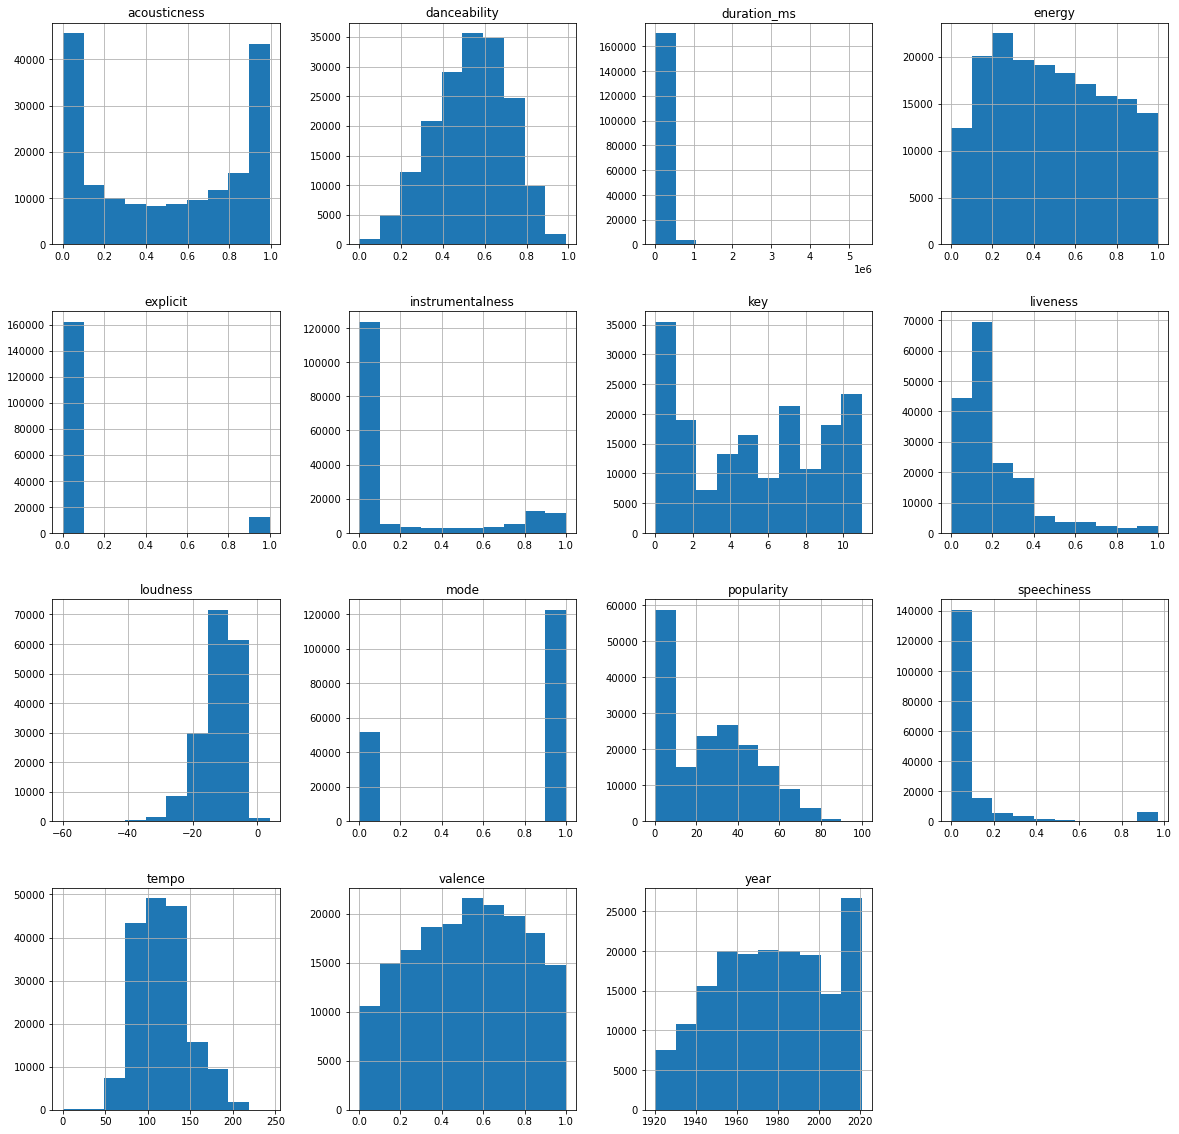

In [11]:
data.hist(figsize=(20, 20))
plt.show()

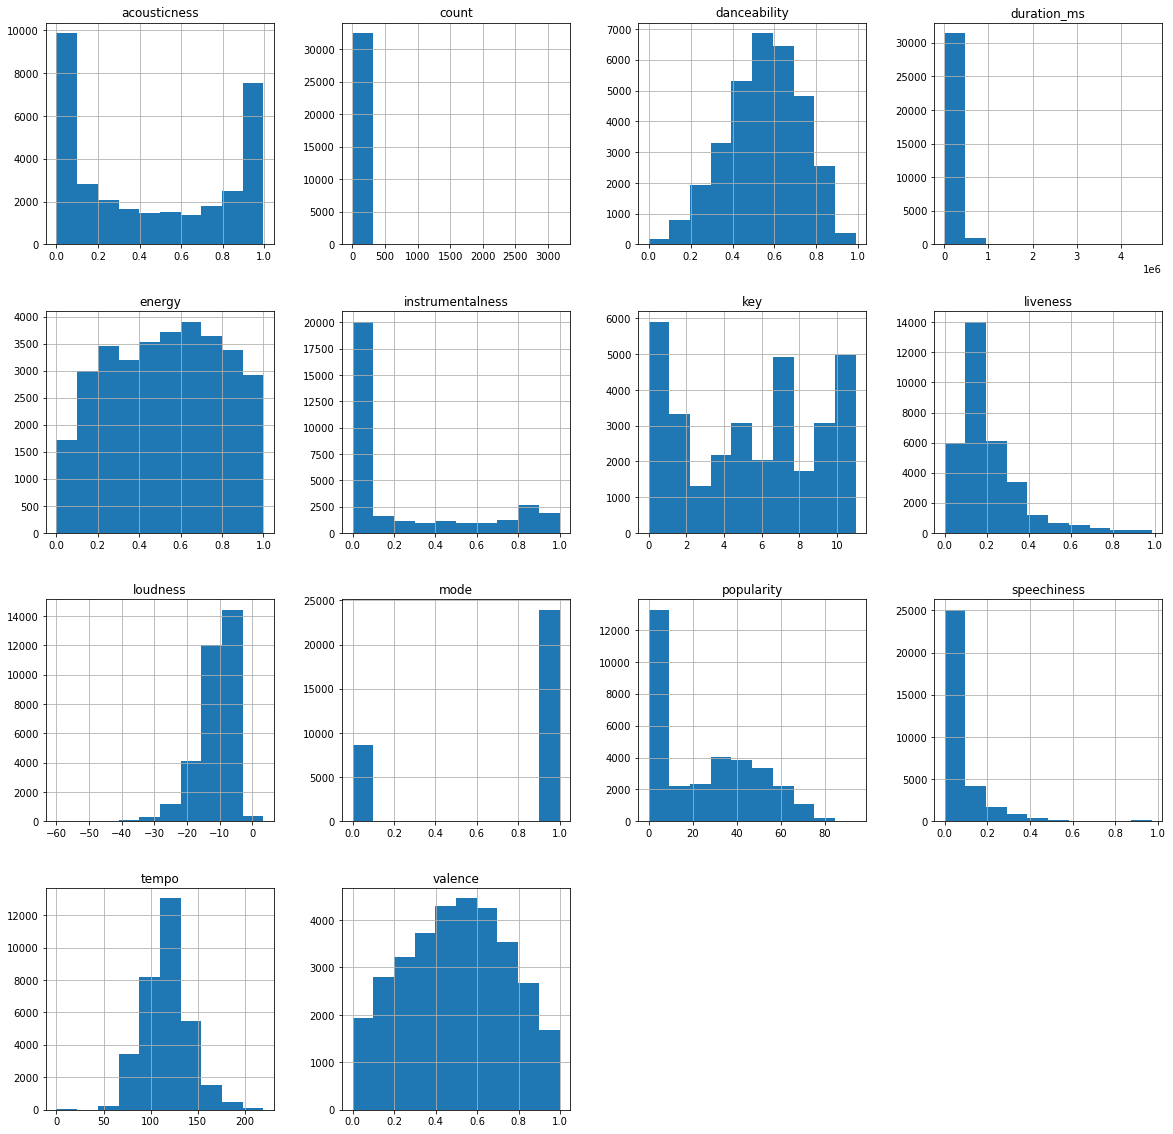

In [12]:
data_artist.hist(figsize=(20, 20))
plt.show()

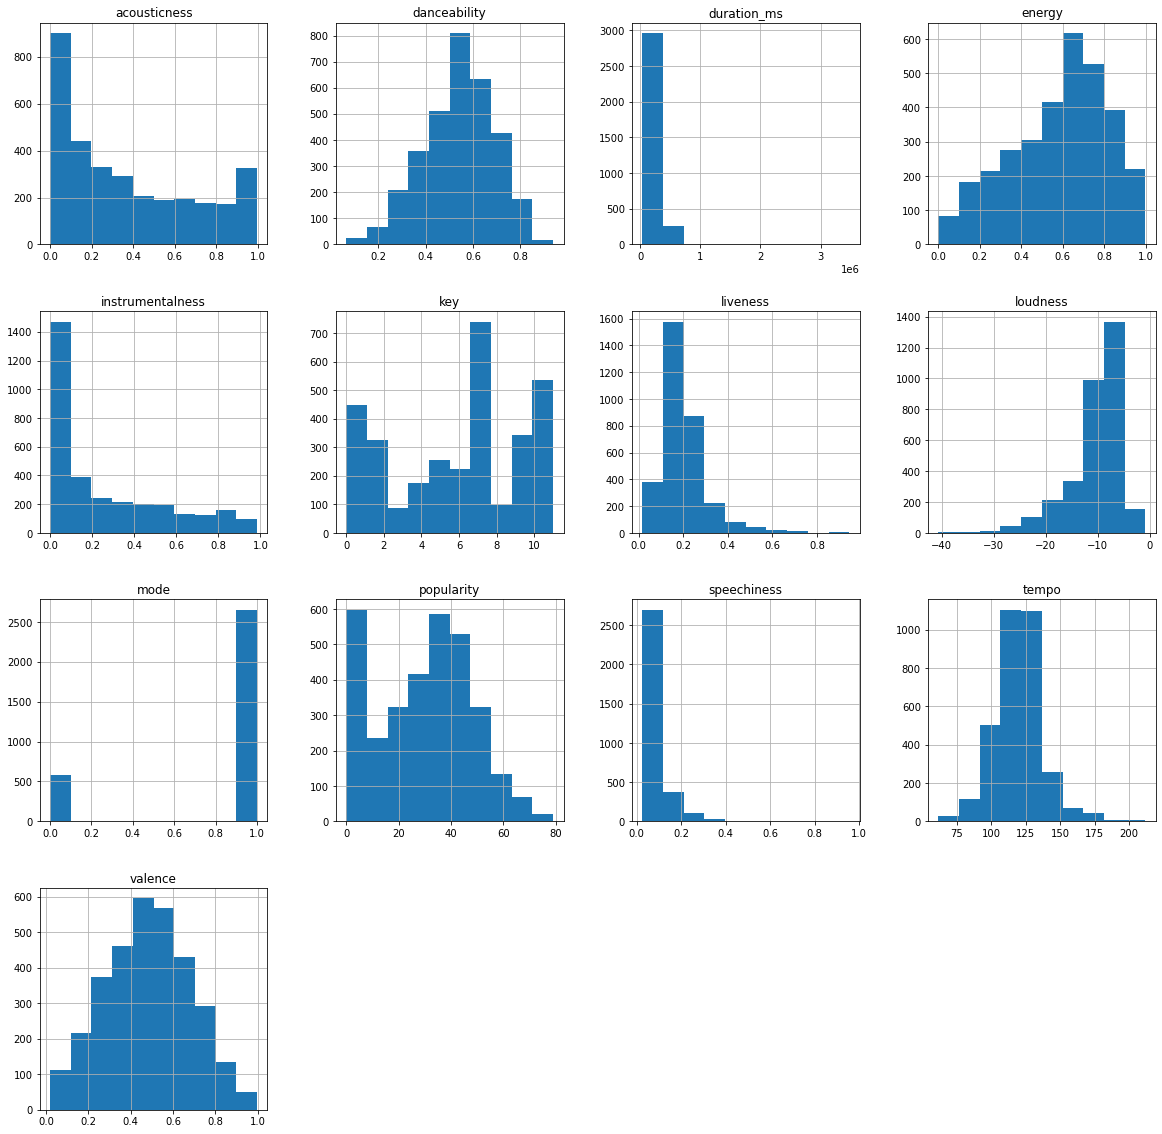

In [13]:
data_gen.hist(figsize=(20, 20))
plt.show()

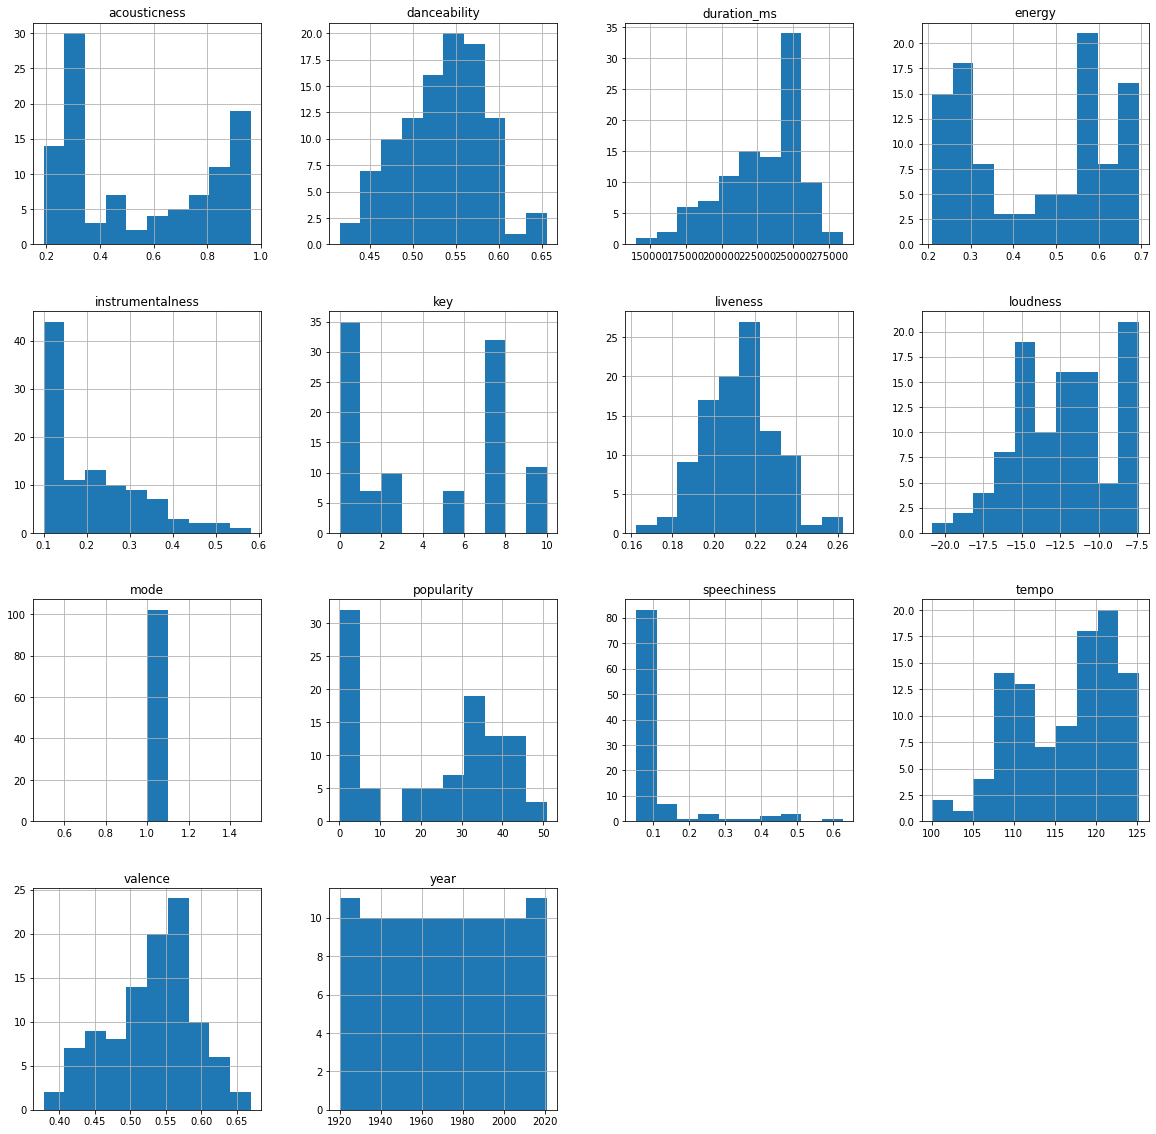

In [14]:
data_year.hist(figsize=(20, 20))
plt.show()

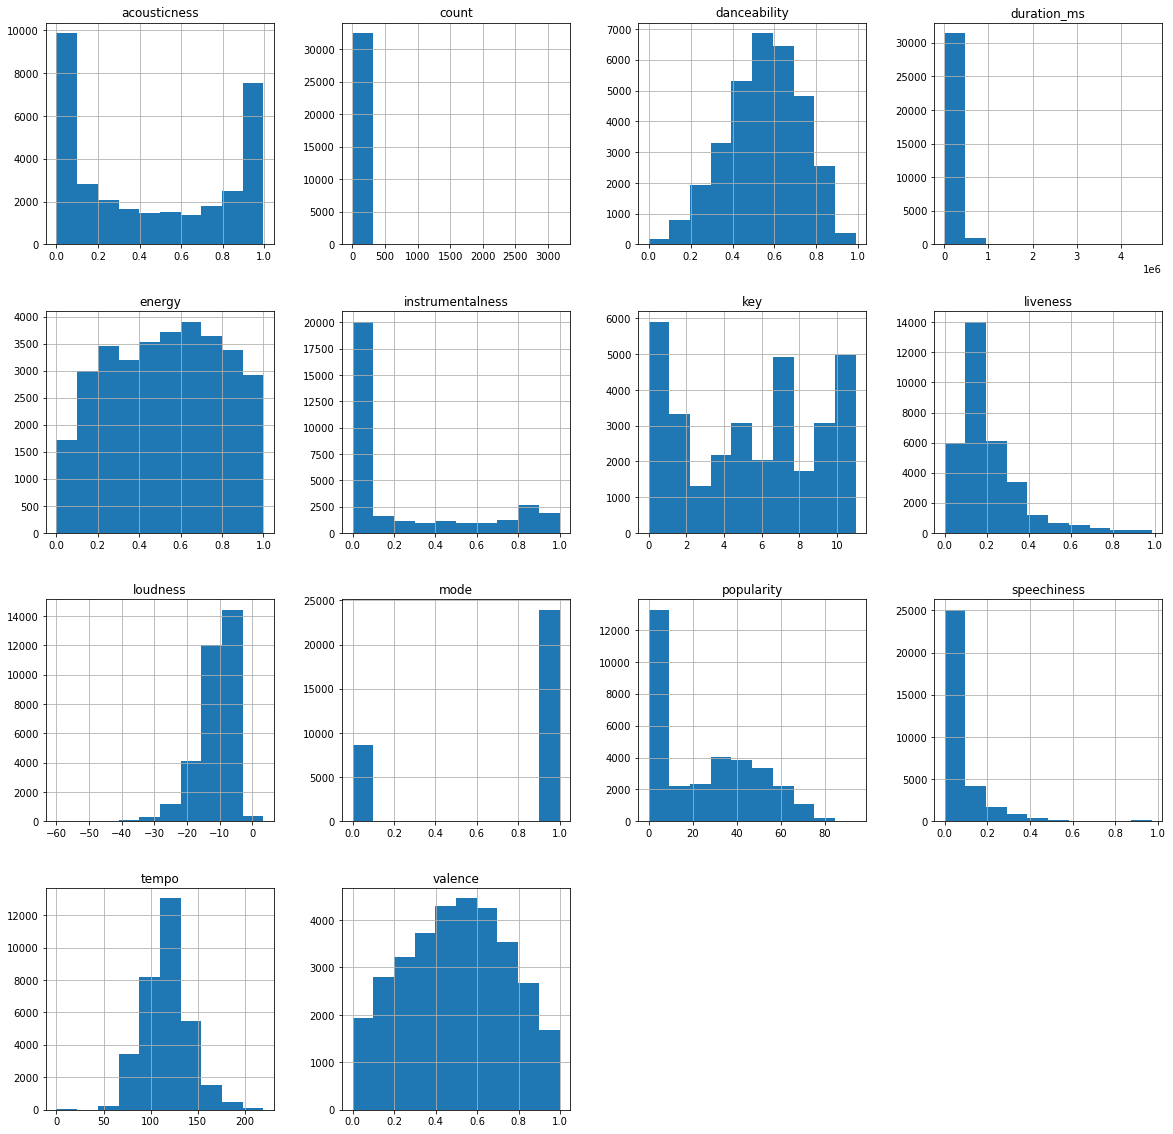

In [15]:
data_w_geners.hist(figsize=(20, 20))
plt.show()

### 히트맵에서 파악해본 결과 가장 상관관계가 높은 변수는 `loudness`와`energy`이다.
그 외에는 다른 관계성을 찾기가 어렵다.

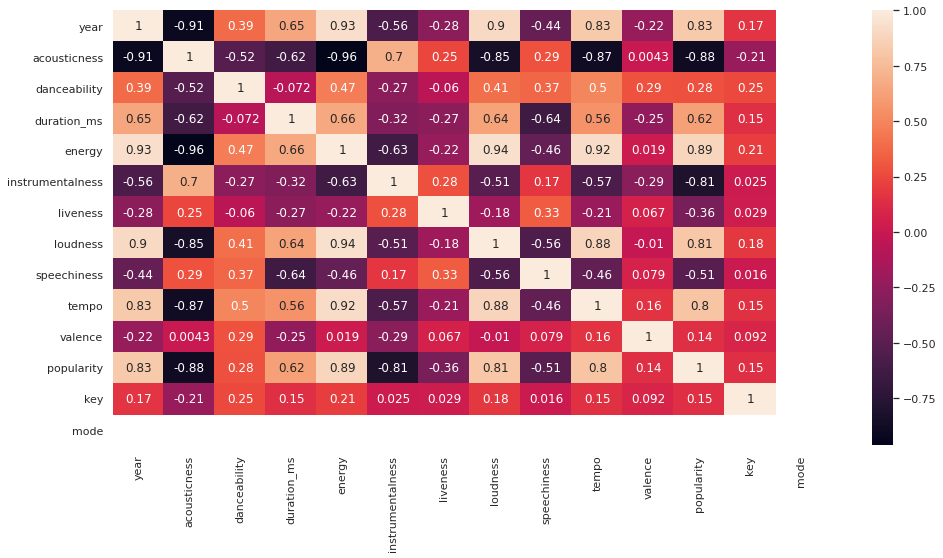

In [66]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = data_year.corr()
sns.heatmap(corr,annot=True)

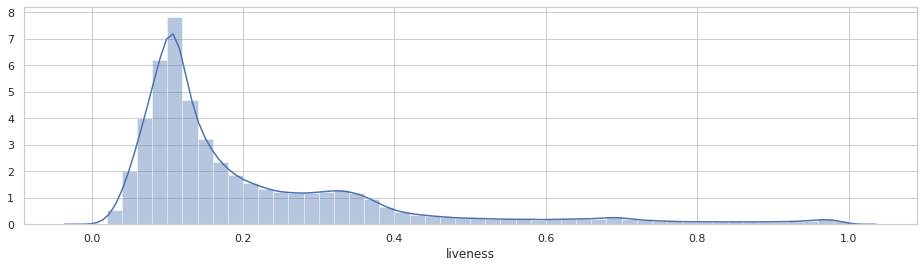

In [21]:
plt.figure(figsize=(16, 4))
sns.distplot(data["liveness"])

<Figure size 1152x576 with 0 Axes>

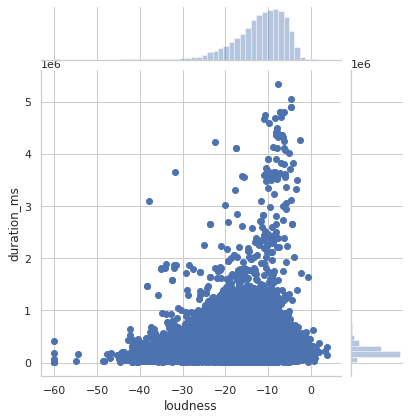

In [63]:
plt.figure(figsize=(16, 8))
ax = sns.jointplot(x=data['loudness'],y=data["duration_ms"],data=data)

<Figure size 1152x576 with 0 Axes>

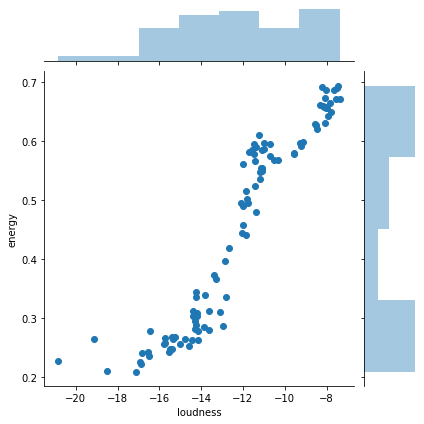

In [3]:
plt.figure(figsize=(16,8))
ax=sns.jointplot(x=data_year['loudness'], y=data_year["energy"],data=data_year)

<Figure size 1152x576 with 0 Axes>

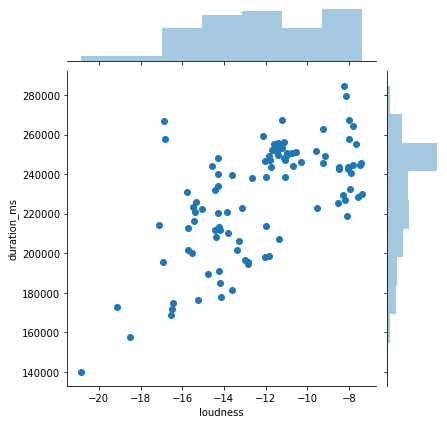

In [4]:
plt.figure(figsize=(16, 8))
ax = sns.jointplot(x=data_year['loudness'],y=data_year["duration_ms"],data=data_year)

<Figure size 1152x576 with 0 Axes>

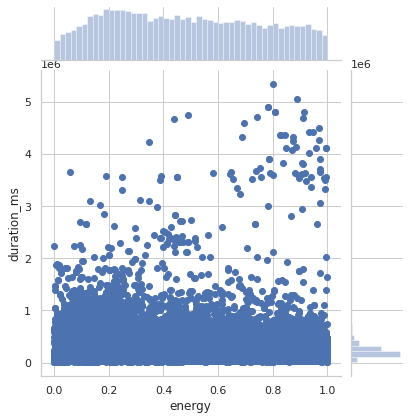

In [60]:
plt.figure(figsize=(16, 8))
ax = sns.jointplot(x=data['energy'],y=data["duration_ms"],data=data)

TypeError: kdeplot() got multiple values for argument 'data'

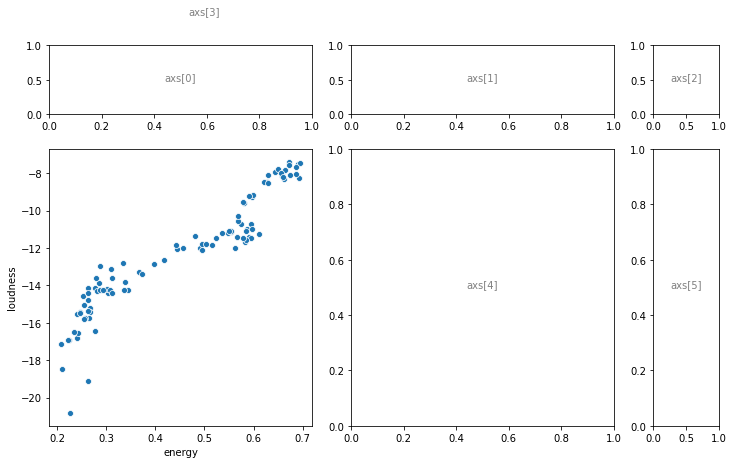

In [16]:
fig=plt.figure(figsize=(12,7))
widths= [4,4,1]
heights=[1,4]
spec=fig.add_gridspec(ncols=3,nrows=2,width_ratios=widths,height_ratios=heights)
axs={}
for i in range(len(heights)*len(widths)):
    axs[i] = fig.add_subplot(spec[i//len(widths),i%len(widths)])
    axs[i].text(0.5,0.5,f"axs[{i}]",fontdict={"horizontalalignment":"center","color":"gray"})
    
# 4th subplot - scatterplot
sns.scatterplot("energy","loudness",data=data_year,ax=axs[3])

# 0th subplot
sns.kdeplot("energy",data=data_year['energy'],ax=axs[0])
axs[0].set(xlabel='',xlim=(axs[3].get_xlim()))
axs[0].set_xticklabels([])


## Top20 인기 음원 분석

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

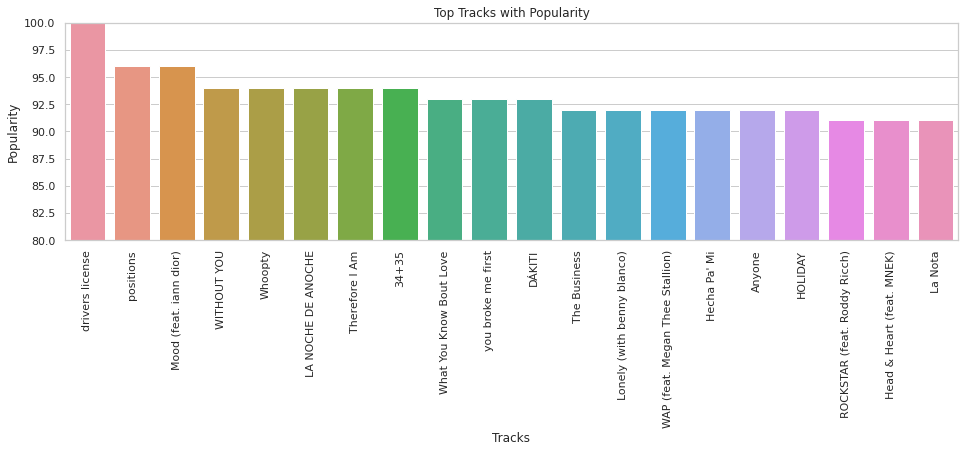

In [58]:
plt.figure(figsize=(16, 4))
sns.set(style="whitegrid")
x = data.groupby("name")["popularity"].mean().sort_values(ascending=False).head(20)
axis = sns.barplot(x.index, x)
axis.set_title('Top Tracks with Popularity')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
axis.set_ylim(80,100)
plt.xticks(rotation = 90)

# Top20 인기 아티스트 분석 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

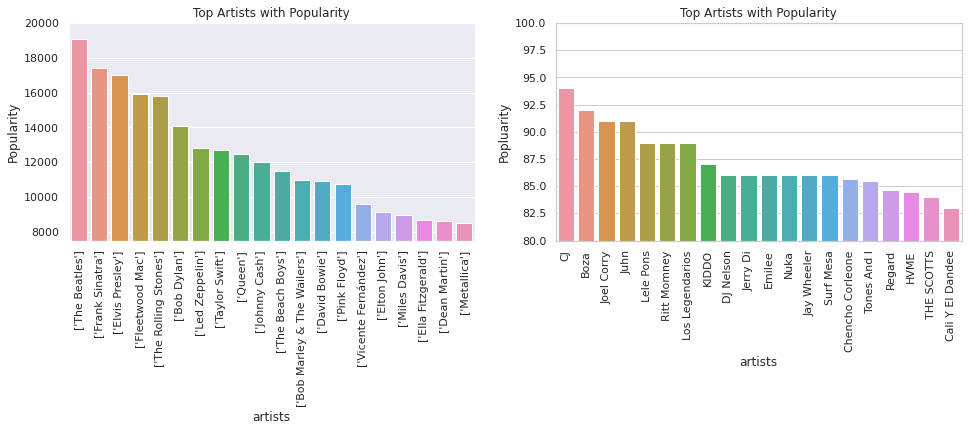

In [57]:

plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
sns.set(style="whitegrid")
x = data.groupby("artists")["popularity"].sum().sort_values(ascending=False).head(20)
ax = sns.barplot(x.index, x)
ax.set(title="Top Artists with Popularity",ylabel="Popularity",ylim=(7500,20000))
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.set(style="darkgrid")
x=data_artist.groupby("artists")["popularity"].sum().sort_values(ascending=False).head(20)
ax=sns.barplot(x.index,x)
ax.set(title="Top Artists with Popularity",ylabel="Popluarity", ylim=(80,100))
plt.xticks(rotation=90)

### 연도별 피쳐값 변동

[Text(0, 0.5, 'counts'),
 Text(0.5, 0, 'year'),
 Text(0.5, 1.0, 'Track Counts by Year')]

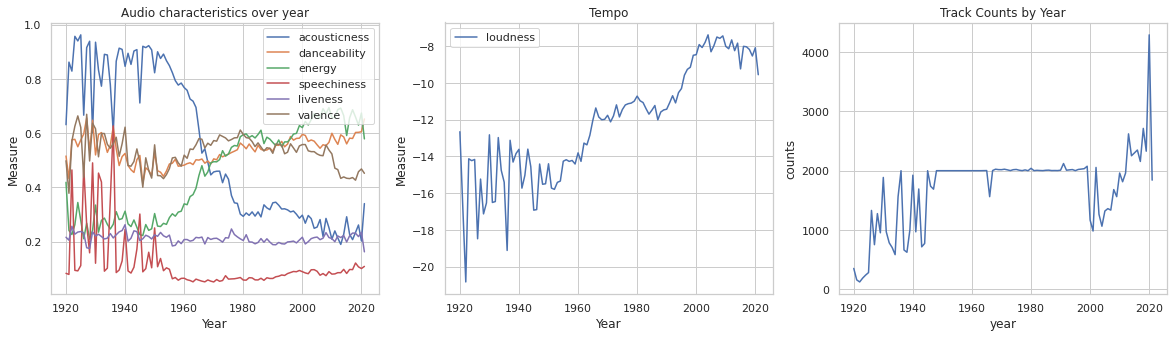

In [50]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.set(style="whitegrid")
columns=["acousticness","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x = data.groupby("year")[col].mean()
    ax = sns.lineplot(x=x.index,y=x,label=col)
ax.legend(loc='upper right')
ax.set_title('Audio characteristics over year')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')
plt.subplot(1,3,2)
sns.set(style="whitegrid")
columns=["loudness"]
for col in columns:
    x = data.groupby("year")[col].mean()
    ax = sns.lineplot(x=x.index,y=x,label=col)
ax.set_title("Tempo")
ax.set(xlabel="Year", ylabel="Measure")
plt.subplot(1,3,3)
sns.set(style="whitegrid")
x=data.groupby("year")["id"].count()
ax = sns.lineplot(x=x.index,y=x)
ax.set(title="Track Counts by Year",xlabel="year",ylabel="counts")
